In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import datetime
import xgboost as xgb
from math import sqrt
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score

import warnings

In [2]:
warnings.simplefilter(action='ignore')

In [3]:
train_data = pd.read_csv("./dataset/train.csv")
print(train_data.shape)
train_data

(6255, 13)


,id,Store,Date,Temperature,Fuel_Price,Promotion1,Promotion2,Promotion3,Promotion4,Promotion5,Unemployment,IsHoliday,Weekly_Sales
0,1,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,8.106,False,1643690.90
1,2,1,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,8.106,True,1641957.44
2,3,1,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,8.106,False,1611968.17
3,4,1,26/02/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,8.106,False,1409727.59
4,5,1,05/03/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,8.106,False,1554806.68
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6250,6251,45,31/08/2012,75.09,3.867,23641.30,6.00,92.93,6988.31,3992.13,8.684,False,734297.87
6251,6252,45,07/09/2012,75.70,3.911,11024.45,12.80,52.63,1854.77,2055.70,8.684,True,766512.66
6252,6253,45,14/09/2012,67.87,3.948,11407.95,NaN,4.30,3421.72,5268.92,8.684,False,702238.27
6253,6254,45,21/09/2012,65.32,4.038,8452.20,92.28,63.24,2376.38,8670.40,8.684,False,723086.20


In [4]:
test_data = pd.read_csv("./dataset/test.csv")
print(test_data.shape)
test_data

(180, 12)


,id,Store,Date,Temperature,Fuel_Price,Promotion1,Promotion2,Promotion3,Promotion4,Promotion5,Unemployment,IsHoliday
0,1,1,05/10/2012,68.55,3.617,8077.89,NaN,18.22,3617.43,3626.14,6.573,False
1,2,1,12/10/2012,62.99,3.601,2086.18,NaN,8.11,602.36,5926.45,6.573,False
2,3,1,19/10/2012,67.97,3.594,950.33,NaN,4.93,80.25,2312.85,6.573,False
3,4,1,26/10/2012,69.16,3.506,2585.85,31.75,6.00,1057.16,1305.01,6.573,False
4,5,2,05/10/2012,70.27,3.617,6037.76,NaN,10.04,3027.37,3853.40,6.170,False
...,...,...,...,...,...,...,...,...,...,...,...,...
175,176,44,26/10/2012,46.97,3.755,38.65,2.61,0.98,NaN,457.74,5.217,False
176,177,45,05/10/2012,64.89,3.985,5046.74,NaN,18.82,2253.43,2340.01,8.667,False
177,178,45,12/10/2012,54.47,4.000,1956.28,NaN,7.89,599.32,3990.54,8.667,False
178,179,45,19/10/2012,56.47,3.969,2004.02,NaN,3.18,437.73,1537.49,8.667,False


In [5]:
train_data["IsHoliday"] = train_data["IsHoliday"].astype(int)

In [6]:
train_data.describe()

,id,Store,Temperature,Fuel_Price,Promotion1,Promotion2,Promotion3,Promotion4,Promotion5,Unemployment,IsHoliday,Weekly_Sales
count,6255.000000,6255.000000,6255.000000,6255.000000,2102.000000,1592.000000,1885.000000,1819.000000,2115.000000,6255.000000,6255.000000,6.255000e+03
mean,3128.000000,23.000000,60.639199,3.344369,7155.930661,3308.125810,1462.535523,3465.952501,4518.993173,8.029236,0.071942,1.047619e+06
std,1805.807299,12.988211,18.624094,0.455364,8408.206085,9382.823804,9667.580258,6413.116294,6048.661908,1.874875,0.258413,5.654362e+05
min,1.000000,1.000000,-2.060000,2.472000,0.270000,-265.760000,-29.100000,0.410000,135.160000,4.077000,0.000000,2.099862e+05
25%,1564.500000,12.000000,47.170000,2.917000,1844.295000,39.755000,4.700000,499.895000,1742.305000,6.916500,0.000000,5.538695e+05
50%,3128.000000,23.000000,62.720000,3.413000,5221.140000,205.410000,24.600000,1532.630000,3226.410000,7.906000,0.000000,9.604761e+05
75%,4691.500000,34.000000,75.220000,3.722000,9199.242500,1931.005000,104.010000,3640.905000,5444.030000,8.622000,0.000000,1.421209e+06
max,6255.000000,45.000000,100.140000,4.308000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,14.313000,1.000000,3.818686e+06


In [7]:
x = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
x_cols = train_data.select_dtypes(include=x).columns
train_data.loc[train_data[x_cols].isna().sum(axis=1) > 0, x_cols]

,id,Store,Temperature,Fuel_Price,Promotion1,Promotion2,Promotion3,Promotion4,Promotion5,Unemployment,IsHoliday,Weekly_Sales
0,1,1,42.31,2.572,NaN,NaN,NaN,NaN,NaN,8.106,0,1643690.90
1,2,1,38.51,2.548,NaN,NaN,NaN,NaN,NaN,8.106,1,1641957.44
2,3,1,39.93,2.514,NaN,NaN,NaN,NaN,NaN,8.106,0,1611968.17
3,4,1,46.63,2.561,NaN,NaN,NaN,NaN,NaN,8.106,0,1409727.59
4,5,1,46.50,2.625,NaN,NaN,NaN,NaN,NaN,8.106,0,1554806.68
...,...,...,...,...,...,...,...,...,...,...,...,...
6234,6235,45,61.24,3.889,12611.18,NaN,21.36,1667.39,2313.12,8.567,0,770487.37
6235,6236,45,66.30,3.848,6813.74,NaN,13.86,936.49,2941.55,8.567,0,800842.28
6236,6237,45,67.21,3.798,5370.39,NaN,361.22,1287.62,2461.81,8.567,0,817741.17
6241,6242,45,75.22,3.506,3291.36,425.6,NaN,314.88,2255.34,8.567,0,773367.71


In [8]:
train_data.isna().sum()

id                 0
Store              0
Date               0
Temperature        0
Fuel_Price         0
Promotion1      4153
Promotion2      4663
Promotion3      4370
Promotion4      4436
Promotion5      4140
Unemployment       0
IsHoliday          0
Weekly_Sales       0
dtype: int64

In [9]:
train_data = train_data.fillna(0)
train_data.isna().sum()

id              0
Store           0
Date            0
Temperature     0
Fuel_Price      0
Promotion1      0
Promotion2      0
Promotion3      0
Promotion4      0
Promotion5      0
Unemployment    0
IsHoliday       0
Weekly_Sales    0
dtype: int64

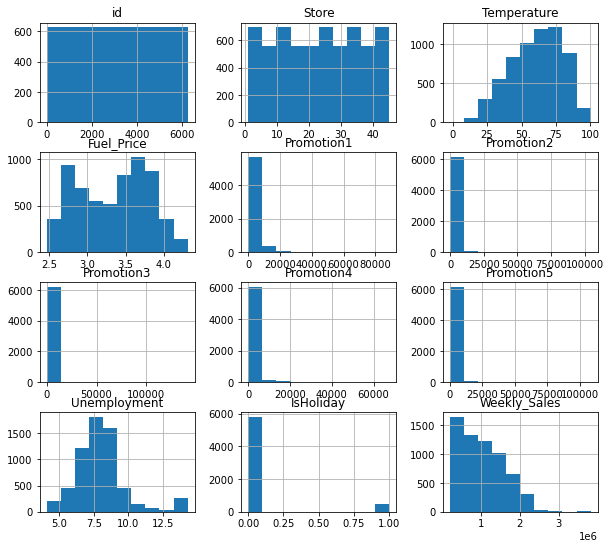

In [10]:
train_data.hist(figsize=(10, 9))
plt.show()

In [11]:
train_data['Date'] = pd.to_datetime(train_data['Date'])
train_data['year'] = train_data['Date'].dt.year
train_data['month'] = train_data['Date'].dt.month

In [12]:
train_data = train_data.drop(['id', 'Date'], axis=1)
train_data

,Store,Temperature,Fuel_Price,Promotion1,Promotion2,Promotion3,Promotion4,Promotion5,Unemployment,IsHoliday,Weekly_Sales,year,month
0,1,42.31,2.572,0.00,0.00,0.00,0.00,0.00,8.106,0,1643690.90,2010,5
1,1,38.51,2.548,0.00,0.00,0.00,0.00,0.00,8.106,1,1641957.44,2010,12
2,1,39.93,2.514,0.00,0.00,0.00,0.00,0.00,8.106,0,1611968.17,2010,2
3,1,46.63,2.561,0.00,0.00,0.00,0.00,0.00,8.106,0,1409727.59,2010,2
4,1,46.50,2.625,0.00,0.00,0.00,0.00,0.00,8.106,0,1554806.68,2010,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6250,45,75.09,3.867,23641.30,6.00,92.93,6988.31,3992.13,8.684,0,734297.87,2012,8
6251,45,75.70,3.911,11024.45,12.80,52.63,1854.77,2055.70,8.684,1,766512.66,2012,7
6252,45,67.87,3.948,11407.95,0.00,4.30,3421.72,5268.92,8.684,0,702238.27,2012,9
6253,45,65.32,4.038,8452.20,92.28,63.24,2376.38,8670.40,8.684,0,723086.20,2012,9


In [13]:
train_data = train_data.drop(['year', 'month'], axis=1)
train_data

,Store,Temperature,Fuel_Price,Promotion1,Promotion2,Promotion3,Promotion4,Promotion5,Unemployment,IsHoliday,Weekly_Sales
0,1,42.31,2.572,0.00,0.00,0.00,0.00,0.00,8.106,0,1643690.90
1,1,38.51,2.548,0.00,0.00,0.00,0.00,0.00,8.106,1,1641957.44
2,1,39.93,2.514,0.00,0.00,0.00,0.00,0.00,8.106,0,1611968.17
3,1,46.63,2.561,0.00,0.00,0.00,0.00,0.00,8.106,0,1409727.59
4,1,46.50,2.625,0.00,0.00,0.00,0.00,0.00,8.106,0,1554806.68
...,...,...,...,...,...,...,...,...,...,...,...
6250,45,75.09,3.867,23641.30,6.00,92.93,6988.31,3992.13,8.684,0,734297.87
6251,45,75.70,3.911,11024.45,12.80,52.63,1854.77,2055.70,8.684,1,766512.66
6252,45,67.87,3.948,11407.95,0.00,4.30,3421.72,5268.92,8.684,0,702238.27
6253,45,65.32,4.038,8452.20,92.28,63.24,2376.38,8670.40,8.684,0,723086.20


In [14]:
scaler = preprocessing.MinMaxScaler()
normalized_data = scaler.fit_transform(train_data)
col = ['Store', 'Temperature','Fuel_Price','Promotion1','Promotion2','Promotion3','Promotion4','Promotion5','Unemployment','IsHoliday','Weekly_Sales']
normalized_df = pd.DataFrame(normalized_data, columns = col)
normalized_df

,Store,Temperature,Fuel_Price,Promotion1,Promotion2,Promotion3,Promotion4,Promotion5,Unemployment,IsHoliday,Weekly_Sales
0,0.0,0.434149,0.054466,0.000000,0.002536,0.000205,0.000000,0.000000,0.393611,0.0,0.397291
1,0.0,0.396967,0.041394,0.000000,0.002536,0.000205,0.000000,0.000000,0.393611,1.0,0.396811
2,0.0,0.410861,0.022876,0.000000,0.002536,0.000205,0.000000,0.000000,0.393611,0.0,0.388501
3,0.0,0.476419,0.048475,0.000000,0.002536,0.000205,0.000000,0.000000,0.393611,0.0,0.332458
4,0.0,0.475147,0.083333,0.000000,0.002536,0.000205,0.000000,0.000000,0.393611,0.0,0.372661
...,...,...,...,...,...,...,...,...,...,...,...
6250,1.0,0.754892,0.759804,0.266691,0.002593,0.000861,0.103569,0.036787,0.450078,0.0,0.145291
6251,1.0,0.760861,0.783769,0.124364,0.002658,0.000577,0.027488,0.018943,0.450078,1.0,0.154218
6252,1.0,0.684247,0.803922,0.128690,0.002536,0.000236,0.050711,0.048553,0.450078,0.0,0.136407
6253,1.0,0.659295,0.852941,0.095347,0.003417,0.000652,0.035219,0.079897,0.450078,0.0,0.142184


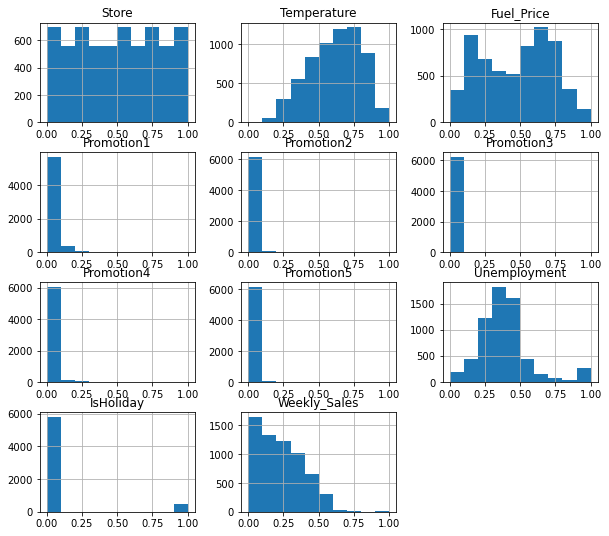

In [15]:
normalized_df.hist(figsize=(10, 9))
plt.show()

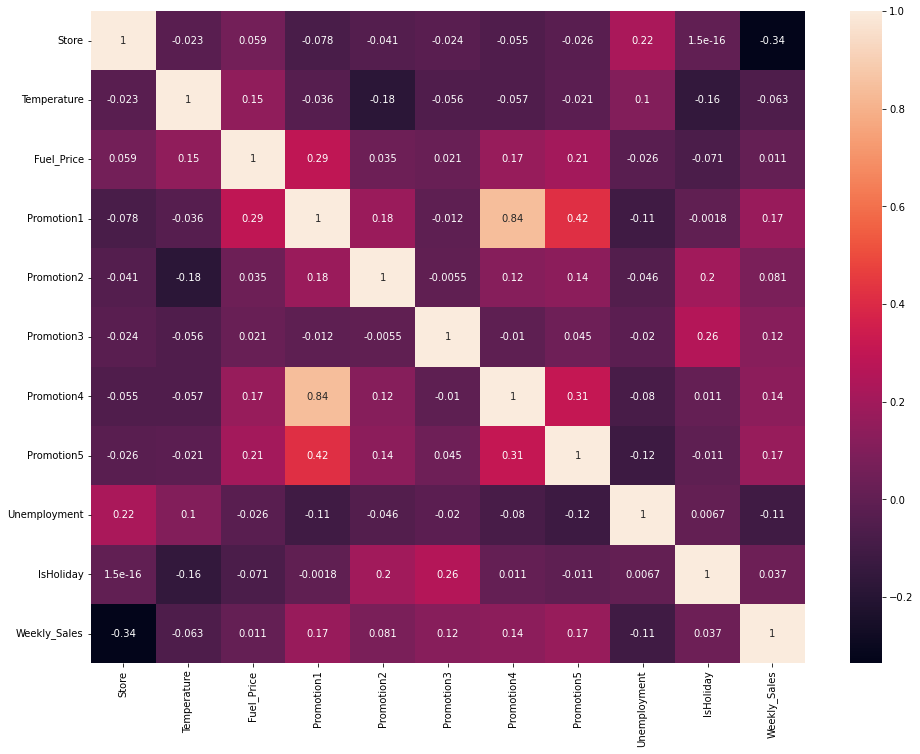

In [16]:
plt.figure(figsize = (16, 12))
x = sns.heatmap(train_data.corr(), annot = True)

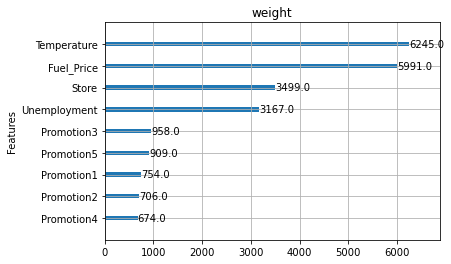

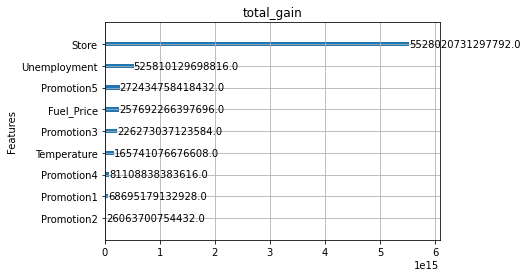

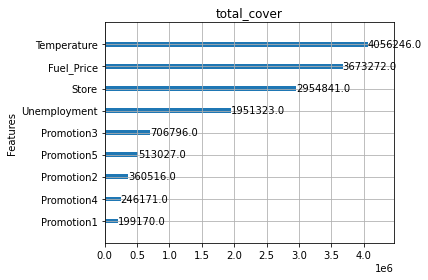

In [38]:
#변수 중요도 확인
xgb.plot_importance(xgb3_model, importance_type = 'weight', title = 'weight', xlabel='', grid = 'False')
xgb.plot_importance(xgb3_model, importance_type = 'total_gain', title = 'total_gain', xlabel='', grid = 'False')
xgb.plot_importance(xgb3_model, importance_type = 'total_cover', title = 'total_cover', xlabel='', grid = 'False')
plt.tight_layout()
plt.show()

In [18]:
y_target = normalized_df['Weekly_Sales']
x_data = normalized_df.drop(['Weekly_Sales', 'IsHoliday'], axis = 1)
x_data

,Store,Temperature,Fuel_Price,Promotion1,Promotion2,Promotion3,Promotion4,Promotion5,Unemployment
0,0.0,0.434149,0.054466,0.000000,0.002536,0.000205,0.000000,0.000000,0.393611
1,0.0,0.396967,0.041394,0.000000,0.002536,0.000205,0.000000,0.000000,0.393611
2,0.0,0.410861,0.022876,0.000000,0.002536,0.000205,0.000000,0.000000,0.393611
3,0.0,0.476419,0.048475,0.000000,0.002536,0.000205,0.000000,0.000000,0.393611
4,0.0,0.475147,0.083333,0.000000,0.002536,0.000205,0.000000,0.000000,0.393611
...,...,...,...,...,...,...,...,...,...
6250,1.0,0.754892,0.759804,0.266691,0.002593,0.000861,0.103569,0.036787,0.450078
6251,1.0,0.760861,0.783769,0.124364,0.002658,0.000577,0.027488,0.018943,0.450078
6252,1.0,0.684247,0.803922,0.128690,0.002536,0.000236,0.050711,0.048553,0.450078
6253,1.0,0.659295,0.852941,0.095347,0.003417,0.000652,0.035219,0.079897,0.450078


In [19]:
y_target = normalized_df['Weekly_Sales']
x_data = normalized_df.drop(['IsHoliday', 'Fuel_Price', 'Temperature', 'Weekly_Sales'], axis = 1)
x_data

,Store,Promotion1,Promotion2,Promotion3,Promotion4,Promotion5,Unemployment
0,0.0,0.000000,0.002536,0.000205,0.000000,0.000000,0.393611
1,0.0,0.000000,0.002536,0.000205,0.000000,0.000000,0.393611
2,0.0,0.000000,0.002536,0.000205,0.000000,0.000000,0.393611
3,0.0,0.000000,0.002536,0.000205,0.000000,0.000000,0.393611
4,0.0,0.000000,0.002536,0.000205,0.000000,0.000000,0.393611
...,...,...,...,...,...,...,...
6250,1.0,0.266691,0.002593,0.000861,0.103569,0.036787,0.450078
6251,1.0,0.124364,0.002658,0.000577,0.027488,0.018943,0.450078
6252,1.0,0.128690,0.002536,0.000236,0.050711,0.048553,0.450078
6253,1.0,0.095347,0.003417,0.000652,0.035219,0.079897,0.450078


In [20]:
y_target = train_data['Weekly_Sales']
x_data = train_data.drop(['IsHoliday', 'Weekly_Sales'], axis = 1)
x_data

,Store,Temperature,Fuel_Price,Promotion1,Promotion2,Promotion3,Promotion4,Promotion5,Unemployment
0,1,42.31,2.572,0.00,0.00,0.00,0.00,0.00,8.106
1,1,38.51,2.548,0.00,0.00,0.00,0.00,0.00,8.106
2,1,39.93,2.514,0.00,0.00,0.00,0.00,0.00,8.106
3,1,46.63,2.561,0.00,0.00,0.00,0.00,0.00,8.106
4,1,46.50,2.625,0.00,0.00,0.00,0.00,0.00,8.106
...,...,...,...,...,...,...,...,...,...
6250,45,75.09,3.867,23641.30,6.00,92.93,6988.31,3992.13,8.684
6251,45,75.70,3.911,11024.45,12.80,52.63,1854.77,2055.70,8.684
6252,45,67.87,3.948,11407.95,0.00,4.30,3421.72,5268.92,8.684
6253,45,65.32,4.038,8452.20,92.28,63.24,2376.38,8670.40,8.684


In [21]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_target, test_size = 0.15, random_state = 0)

In [22]:
xgb3_model = xgb.XGBRegressor(n_estimators = 500, learning_rate=0.1, min_child_weight = 8, max_depth = 7, subsample = 0.8, colsample_bytree = 0.9)
#0.15
xgb3_model.fit(x_train,y_train)
prediction3 = xgb3_model.predict(x_test)
xgb3_score = xgb3_model.score(x_test, y_test)
prediction3
xgb3_score


0.9667102226607236

In [48]:
bef = 0
x = 0
for i in range(0, 100) :
    x_train, x_test, y_train, y_test = train_test_split(x_data, y_target, test_size = 0.15, random_state = i)
    xgb3_model = xgb.XGBRegressor(n_estimators = 400, learning_rate=0.1, min_child_weight = 7, max_depth = 5, subsample = 0.6, colsample_bytree = 0.9)
    #0.15
    xgb3_model.fit(x_train,y_train)
    prediction3 = xgb3_model.predict(x_test)
    xgb3_score = xgb3_model.score(x_test, y_test)
    if bef < xgb3_score :
        bef = xgb3_score
        x = i
x, xgb3_score

{'colsample_bytree': 0.9,
 'learning_rate': 0.1,
 'max_depth': 7,
 'min_child_weight': 8,
 'n_estimators': 500,
 'subsample': 0.8}

(0, 0.935161382319893)

In [17]:
Xgb = xgb.XGBRegressor()#0.15

xgb_param={
    'n_estimators' : [300,400,500],
    'min_child_weight' : [5, 6, 7, 8],
    'colsample_bytree' : [0.6, 0.7, 0.8,0.9],
    'subsample' : [0.6, 0.7, 0.8],
    'learning_rate' : [0.1, 0.2, 0.3],
    'max_depth' : [4, 5, 6, 7]
}

xgb_grid = GridSearchCV(Xgb, param_grid = xgb_param)
xgb_grid.fit(x_train, y_train)
xgb_grid.best_params_

{'colsample_bytree': 0.9,
 'learning_rate': 0.1,
 'max_depth': 7,
 'min_child_weight': 8,
 'n_estimators': 500,
 'subsample': 0.8}

In [23]:
l1_model = Lasso(alpha=1, max_iter=2000, normalize=True)

l1_model.fit(x_train, y_train)
y_train_predict = l1_model.predict(x_train)
y_test_predict = l1_model.predict(x_test)

mse = mean_squared_error(y_train, y_train_predict)

print("training set에서 성능")
print("-----------------------")
print(f'오차: {sqrt(mse)}')

lasso_mse = mean_squared_error(y_test, y_test_predict)

print("testing set에서 성능")
print("-----------------------")
print(f'오차: {sqrt(lasso_mse)}')
l1_score = l1_model.score(x_test, y_test)
l1_score

training set에서 성능
-----------------------
오차: 521592.2984911635
testing set에서 성능
-----------------------
오차: 493098.36350315914


0.16261611538061405

In [24]:
l2_model = Ridge(alpha=1, max_iter=2000, normalize=True)
l2_model.fit(x_train, y_train)
y_train_predict = l2_model.predict(x_train)
y_test_predict = l2_model.predict(x_test)

mse = mean_squared_error(y_train, y_train_predict)

print("training set에서 성능")
print("-----------------------")
print(f'오차: {sqrt(mse)}')

ridge_mse = mean_squared_error(y_test, y_test_predict)

print("testing set에서 성능")
print("-----------------------")
print(f'오차: {sqrt(ridge_mse)}')
l2_score = l2_model.score(x_test, y_test)
l2_score

training set에서 성능
-----------------------
오차: 531908.1757053537
testing set에서 성능
-----------------------
오차: 503516.6374602782


0.12685750201719115

In [23]:
forest_model = RandomForestRegressor(random_state = 0, n_jobs = -1)

params = { 
    'n_estimators' : [10, 50, 100],
    'max_depth' : [6, 8, 10, 12], 
    'min_samples_leaf' : [8, 12, 18],
    'min_samples_split' : [8, 16, 20]
}

grid_cv = GridSearchCV(forest_model, param_grid = params, cv = 3, n_jobs = -1)
grid_cv.fit(x_train, y_train)

print('최적 하이퍼 파라미터: ', grid_cv.best_params_)
print('최고 예측 정확도: {:.4f}'.format(grid_cv.best_score_))


최적 하이퍼 파라미터:  {'max_depth': 12, 'min_samples_leaf': 8, 'min_samples_split': 8, 'n_estimators': 100}
최고 예측 정확도: 0.9040


In [25]:
forest_test_model = RandomForestRegressor(random_state = 0, n_estimators = 100, max_depth = 12, min_samples_leaf = 8, min_samples_split = 8)
forest_test_model.fit(x_train, y_train)
forest_predictions = forest_test_model.predict(x_test)
forest_score = forest_test_model.score(x_test, y_test)

# 출력 코드
forest_predictions, forest_score

(array([ 973020.1961797 , 1307562.93012922, 1625858.1506697 ,
        2017699.49320745, 1907334.12855371, 1416603.76072066,
         766996.99771756, 1053814.05134657, 1409619.11220144,
        2044848.36313799,  513248.84530236,  525680.64427491,
        1424670.50987756,  528358.1197458 , 1173689.00898066,
        1020538.17847652, 1295171.35096331, 1013574.08849539,
         409780.10783864,  935296.59747288,  539665.53057133,
         256982.6411907 ,  350947.90114557,  515844.85949538,
        1081993.88868236,  954564.04569653,  455500.78387186,
         485868.96950635,  954564.04569653, 1397781.65471345,
        1967499.99202608, 2168091.23759578,  963984.18726162,
         407609.57804587, 2158043.43080595, 1949944.68150165,
        1804194.4732151 ,  827507.19073001, 1456562.72671854,
         345048.35401187, 1472511.13911501, 1434759.95774009,
        1153416.17747171,  525484.14631688, 1018918.76620562,
         533725.34869633,  570581.79926934,  959199.53496149,
        

In [24]:
dec = DecisionTreeRegressor()

dec_tree_param= {
    'max_depth' : [1,2,3,4,5,6,7,8,9,10]
}
reg = GridSearchCV(dec, dec_tree_param, cv = 5)
reg.fit(x_train, y_train)
reg.best_params_

{'max_depth': 10}

In [26]:
decision_tree_model = DecisionTreeRegressor(max_depth = 10, random_state = 0)
decision_tree_model.fit(x_train, y_train)
dec_tree_pred = decision_tree_model.predict(x_test)
dec_score = decision_tree_model.score(x_test, y_test)
dec_tree_pred, dec_score

(array([ 631787.57887324, 1323204.33293333, 1323204.33293333,
        1901776.402     , 1951619.92231788, 1492709.31027778,
         740372.20625   , 1281104.65611511, 1396752.29289855,
        2220600.76      ,  588583.57      ,  514830.35      ,
        1452965.35179487,  530849.625     , 1130914.27486487,
        1000074.80985507, 1340023.72272727,  970514.4895    ,
         439917.0282    ,  774131.32425234,  631787.57887324,
         257278.02797468,  302756.53857143,  528698.315     ,
         774131.32425234,  913119.39193182,  417640.34      ,
         545406.3905    ,  913119.39193182, 1430612.83571429,
        1951619.92231788, 2146631.37      ,  913119.39193182,
         565567.84      , 2146631.37      , 2129035.91      ,
        1790388.7428169 ,  954938.6735    , 1528014.116     ,
         342932.12958333, 1492709.31027778, 1404841.79952381,
        1130914.27486487,  774131.32425234, 1000074.80985507,
         520346.01641026,  587153.7085    ,  913119.39193182,
        

In [27]:
linear_model = LinearRegression()
lin_model = linear_model.fit(x_train, y_train)
y_test_predict = lin_model.predict(x_test)
linear_mse = mean_squared_error(y_test, y_test_predict)
linear_mse = linear_mse ** 0.5
linear_mse
lin_score = lin_model.score(x_test, y_test)
y_test_predict, lin_score

(array([1244289.21496061, 1025079.34922879, 1196056.74675906,
        1307029.15560575, 1171043.48377695, 1209402.5136096 ,
         650918.38505727, 1000164.84840972, 1242619.28644123,
        1244227.02586442,  706630.89461447,  896930.28987386,
        1043640.67688317,  909461.74247048, 1079508.21682351,
        1000228.00539117,  726145.11385612, 1206381.93491319,
         836863.64464205,  840298.54300119, 1286389.54206581,
         866321.39577068, 1321576.98032391,  696125.44700837,
        1041397.66285127, 1019235.06498409,  970958.69050431,
        1139610.4924075 ,  973497.61173769, 1387527.050977  ,
        1104456.00664944, 1414011.66880794, 1108027.72372907,
        1275615.92796373, 1342880.55234131, 1915898.01150392,
        1147982.56901744,  994760.95893778, 1071156.51328988,
         787294.1479501 , 1309961.91827958,  926901.46715917,
        1075550.49546837,  794517.38790127, 1008926.23673816,
         802768.1935735 ,  679199.04646853, 1138328.0462221 ,
        

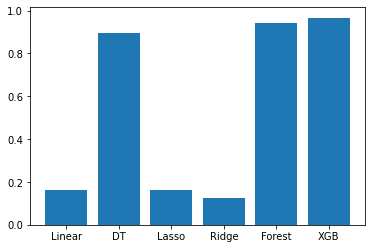

In [29]:
row = [lin_score, dec_score, l1_score, l2_score, forest_score, xgb3_score]
col = ['Linear', 'DT', 'Lasso', 'Ridge', 'Forest', 'XGB']
plt.bar(col, row)
plt.show()

In [30]:
test_data["IsHoliday"] = test_data["IsHoliday"].astype(int)
test_data=test_data.fillna(0)
#test_data = test_data.drop(['id', 'Date'], axis=1)
test_data

,id,Store,Date,Temperature,Fuel_Price,Promotion1,Promotion2,Promotion3,Promotion4,Promotion5,Unemployment,IsHoliday
0,1,1,05/10/2012,68.55,3.617,8077.89,0.00,18.22,3617.43,3626.14,6.573,0
1,2,1,12/10/2012,62.99,3.601,2086.18,0.00,8.11,602.36,5926.45,6.573,0
2,3,1,19/10/2012,67.97,3.594,950.33,0.00,4.93,80.25,2312.85,6.573,0
3,4,1,26/10/2012,69.16,3.506,2585.85,31.75,6.00,1057.16,1305.01,6.573,0
4,5,2,05/10/2012,70.27,3.617,6037.76,0.00,10.04,3027.37,3853.40,6.170,0
...,...,...,...,...,...,...,...,...,...,...,...,...
175,176,44,26/10/2012,46.97,3.755,38.65,2.61,0.98,0.00,457.74,5.217,0
176,177,45,05/10/2012,64.89,3.985,5046.74,0.00,18.82,2253.43,2340.01,8.667,0
177,178,45,12/10/2012,54.47,4.000,1956.28,0.00,7.89,599.32,3990.54,8.667,0
178,179,45,19/10/2012,56.47,3.969,2004.02,0.00,3.18,437.73,1537.49,8.667,0


In [31]:
#scaler = preprocessing.MinMaxScaler()
#normalized_test_data = scaler.fit_transform(test_data)

#col = ['Store', 'Temperature','Fuel_Price','Promotion1','Promotion2','Promotion3','Promotion4','Promotion5','Unemployment','IsHoliday']
#test_normalized_df = pd.DataFrame(normalized_test_data, columns = col)
#test_normalized_df

In [32]:
#test_x_data = test_normalized_df.drop(['IsHoliday', 'Fuel_Price', 'Temperature'], axis = 1)
test_x_data = test_data.drop(['id', 'Date', 'IsHoliday'], axis = 1)
test_x_data

,Store,Temperature,Fuel_Price,Promotion1,Promotion2,Promotion3,Promotion4,Promotion5,Unemployment
0,1,68.55,3.617,8077.89,0.00,18.22,3617.43,3626.14,6.573
1,1,62.99,3.601,2086.18,0.00,8.11,602.36,5926.45,6.573
2,1,67.97,3.594,950.33,0.00,4.93,80.25,2312.85,6.573
3,1,69.16,3.506,2585.85,31.75,6.00,1057.16,1305.01,6.573
4,2,70.27,3.617,6037.76,0.00,10.04,3027.37,3853.40,6.170
...,...,...,...,...,...,...,...,...,...
175,44,46.97,3.755,38.65,2.61,0.98,0.00,457.74,5.217
176,45,64.89,3.985,5046.74,0.00,18.82,2253.43,2340.01,8.667
177,45,54.47,4.000,1956.28,0.00,7.89,599.32,3990.54,8.667
178,45,56.47,3.969,2004.02,0.00,3.18,437.73,1537.49,8.667


In [33]:
lin_model.predict(test_x_data)

array([1419699.88281065, 1400243.81316121, 1328019.10710076,
       1330450.73589545, 1385201.40955396, 1456664.69602358,
       1355839.68060459, 1382400.89246463, 1276804.51710478,
       1265545.99709612, 1299150.30313101, 1255268.98452594,
       1413458.54401712, 1401465.08585562, 1402696.91128113,
       1385074.15145808, 1275469.38138428, 1298493.55149782,
       1248028.68964351, 1251548.23404335, 1399536.69327784,
       1367266.24825478, 1289019.24781264, 1313403.30525082,
       1273892.81826266, 1246429.25436601, 1316729.4613341 ,
       1282344.91724718, 1268519.7359971 , 1286766.7547208 ,
       1261081.7637501 , 1249130.16325006, 1226635.47018978,
       1233763.86853212, 1225811.66655084, 1204391.07192105,
       1317301.84267241, 1270683.90044344, 1202416.31398434,
       1253949.79804093, 1276671.43565007, 1358733.09983699,
       1203651.85217307, 1241626.14409365, 1233554.24590055,
       1182015.23596433, 1156638.52526195, 1331652.20342997,
       1303005.88017989,

In [34]:
xgb_prediction = xgb3_model.predict(test_x_data)
xgb_prediction

array([1630005.5 , 1533729.  , 1450782.  , 1495625.2 , 1870598.2 ,
       1830417.  , 1762804.1 , 1780253.  ,  452798.  ,  462276.72,
        456505.34,  429652.6 , 2234724.8 , 2100882.8 , 2167046.2 ,
       2008485.9 ,  330031.03,  405939.7 ,  357399.75,  317122.62,
       1655453.8 , 1384312.  , 1392243.8 , 1375272.  ,  662357.1 ,
        559427.6 ,  617189.25,  647874.  , 1112296.4 , 1048880.6 ,
       1088343.  , 1108883.4 ,  873655.3 ,  839488.2 ,  813382.7 ,
        821314.5 , 1824401.9 , 1666695.2 , 1748004.2 , 1789824.1 ,
       1361762.5 , 1304752.1 , 1282822.4 , 1353041.  , 1328695.2 ,
       1379997.9 , 1374714.  , 1424100.8 , 2212439.8 , 1889060.6 ,
       1911721.4 , 2028389.2 , 1707965.5 , 1724559.6 , 1741614.8 ,
       1726965.6 ,  508301.78,  529448.3 ,  487732.5 ,  650423.75,
        578954.  ,  475845.84,  483725.84,  510201.4 ,  945806.56,
        802172.2 ,  883473.75,  894673.06, 1042471.8 ,  958709.1 ,
        961026.8 ,  968873.8 , 1348400.9 , 1375991.8 , 1280005

In [35]:
prediction = forest_test_model.predict(test_x_data)
prediction

array([1613225.0977224 , 1550951.07733942, 1424006.90160805,
       1382131.40153206, 1792927.35387112, 1833463.49735214,
       1674171.77098402, 1712819.42763227,  509046.67365502,
        505108.31674402,  525421.4907557 ,  536180.53701305,
       2252806.12974805, 2172068.16716961, 2171398.03733765,
       2202866.6405924 ,  358892.70114569,  370303.7048514 ,
        353433.11314069,  336464.40439252, 1541372.77262086,
       1421604.40149229, 1421884.08689015, 1475195.59882495,
        635246.0404777 ,  624835.58021345,  636218.35839431,
        718027.71071103, 1654967.95394068, 1660288.51305888,
       1664044.67939723, 1662820.99060334, 1531203.92439579,
       1550592.58632111, 1534810.59750662, 1548708.68687332,
       1767659.6313421 , 1746866.01347537, 1806671.62667018,
       1828047.75137876, 1289008.21182804, 1291799.86186207,
       1302230.87170533, 1346721.72289009, 1437973.65414768,
       1399460.80432496, 1439061.94159024, 1487725.2599264 ,
       2014782.1594476 ,

In [36]:
predict = l2_model.predict(test_x_data)

In [37]:
sample_submission = pd.read_csv('./dataset/submission.csv')
sample_submission['Weekly_Sales'] = xgb_prediction

sample_submission.to_csv('submission.csv',index = False)
sample_submission.head()

,id,Weekly_Sales
0,1,1630005.50
1,2,1533729.00
2,3,1450782.00
3,4,1495625.25
4,5,1870598.25
